# Assignment 2


# implement a na¨ıve Bayesian classifier (GaussianNB )

## import liberaries 

In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import timeit

In [ ]:
import sklearn
import matplotlib

print('library versions')
print('sklearn ',sklearn.__version__)
print('numpy ',np.__version__)
print('pandas ',pd.__version__)
print('matplotlib',matplotlib.__version__)
print('seaborn',sns.__version__)
!python --version


library versions
sklearn  1.0.2
numpy  1.21.6
pandas  1.3.5
matplotlib 3.2.2
seaborn 0.11.2
Python 3.7.13


## load the wine data 

In [ ]:
wineData = datasets.load_wine()

In [ ]:
print(wineData['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
X=wineData.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y=wineData.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## split the wine data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42,stratify=y )

In [ ]:
print( y_train)

[0 0 0 0 2 2 1 2 0 0 1 1 0 0 2 1 1 1 0 0 1 2 0 2 2 0 0 1 1 0 0 0 0 0 1 2 0
 1 0 1 1 1 1 1 1 1 0 0 2 0 0 2 1 1 2 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 2 2 0 0
 2 1 1 1 1 2 0 2 0 2 1 2 2 1 0 0 1 1 1 0 0 0 2 1 1 1 2 1 0 1 0 1 2 0 0 1 2
 2 1 1 1 2 2 2 2 1 1 2 1 2 2 0 0 2 0 1 2 2 1 2 1 1 1 2 1 0 2 2]


## train the naive_bayes model 

In [ ]:
Parametric_model = GaussianNB()
Parametric_model.fit(x_train,y_train)

GaussianNB()

## show the classification report 

In [ ]:
y_pred=Parametric_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
y.reshape(-1,1).shape

(178, 1)

## Plot the decision boundary

### Select 2 features

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

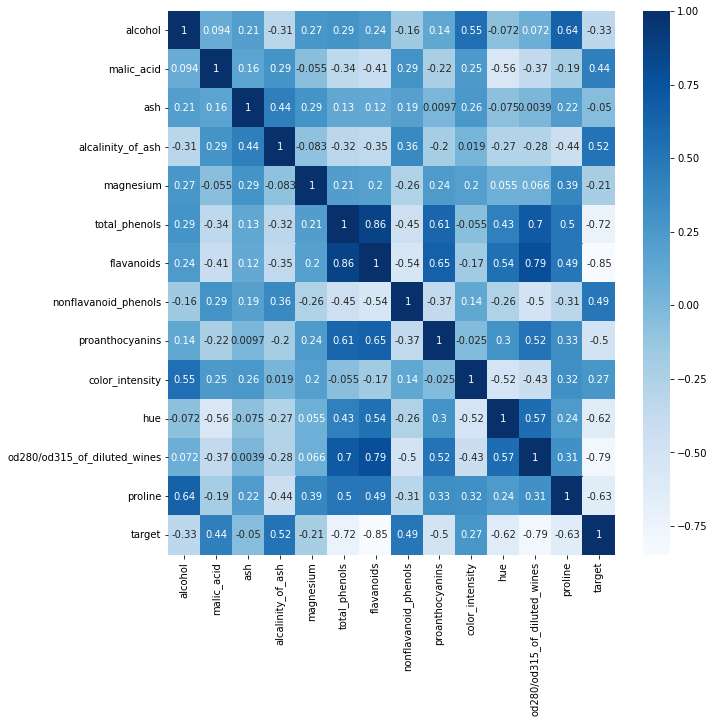

In [ ]:
col_name=wineData.feature_names
col_name.append('target')
new_data=np.concatenate((X,y.reshape(-1,1)),axis=1)
df=pd.DataFrame(new_data,columns=col_name)
print(df)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="Blues")

In [ ]:
abs(df.corr().iloc[:-1,-1]).largest(2)

flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
Name: target, dtype: float64

In [ ]:
# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_kbest = fvalue_selector.fit_transform(x, y)

# View results
print('Original number of features:', x.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
print('The selected features are: ', fvalue_selector.get_feature_names_out())
for index,i in enumerate(df):
  for j in fvalue_selector.get_feature_names_out():
    if i==j:
      print(index)


Original number of features: 13
Reduced number of features: 2
The selected features are:  ['flavanoids' 'proline']
6
12


In [ ]:
# Training data features after selecting the two features
x_train = x_train[:,[6,12]]
x_test = x_test[:,[6,12]]


### retrain model with new features

In [ ]:
model = GaussianNB()

model.fit(x_train,y_train)

GaussianNB()

### plot Decision Boundary

In [ ]:
def plotDecisionBoundary( X, y, model, title='',x_title='',y_title=''):
    plt.close('all')
    plt.figure(figsize=(20,10))
    cm = plt.cm.Set3
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02
    xx, yy= np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cm,
        edgecolors='k',
        alpha=1,
    )
    font1 = {'family':'serif','color':'darkblue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    
    plt.title(title,fontdict = font1)
    plt.xlabel(x_title,fontdict = font2)
    plt.ylabel(y_title,fontdict = font2)

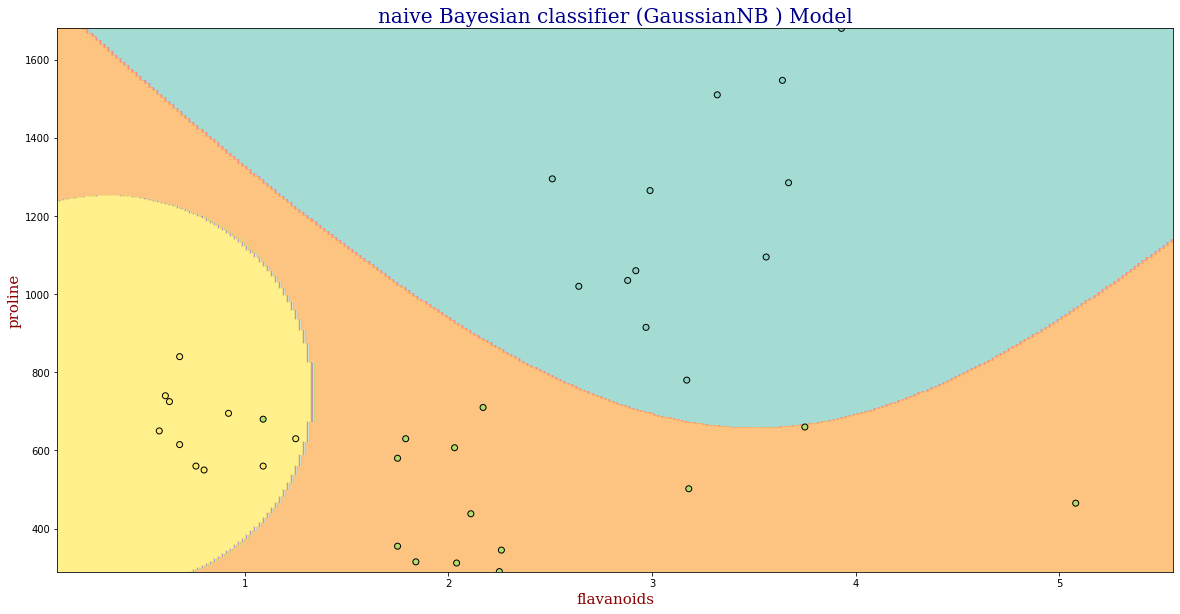

In [ ]:
plotDecisionBoundary(x_test,y_test,model,"naive Bayesian classifier (GaussianNB ) Model","flavanoids","proline")

# part 2  KNN classifier 

## load the car-evaluation-dataset

In [ ]:
car_df=pd.read_csv('car_evaluation.csv',names=["buying price", "maintenance cost", "number of doors", "number of persons", "lug_boot", "safety", "decision"])
car_df



,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
for i in car_df:
    print(i)
    print(car_df[i].unique())

buying price
['vhigh' 'high' 'med' 'low']
maintenance cost
['vhigh' 'high' 'med' 'low']
number of doors
['2' '3' '4' '5more']
number of persons
['2' '4' 'more']
lug_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
decision
['unacc' 'acc' 'vgood' 'good']


## split the dataset  

In [ ]:
print(car_df.iloc[:,:].shape)
X=car_df.iloc[:,:-1]
y=car_df.iloc[:,-1]
x_train, x_test_valid, y_train, y_test_valid = train_test_split(X, y, train_size=1000,random_state=42,stratify=y )
x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size=300,random_state=42,stratify=y_test_valid )

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(1728, 7)
(1000, 6)
(428, 6)
(300, 6)


## preprocessing

In [ ]:
def mapping(x):
    mapper_Price_MC={'low':1,'med':2,'high':3,'vhigh':4}
    mapper_safety={'low':1,'med':2,'high':3}
    mapper_lug_boot={'small':1,'med':2,'big':3}
    mapper_nPerson={'2':2,'3':3,'4':4,'more':5}
    mapper_nDoor={'2':2,'3':3,'4':4,'5more':5}
    x.loc[:,('buying price')]=x.loc[:,('buying price')].replace(mapper_Price_MC)
    x.loc[:,('maintenance cost')]=x.loc[:,('maintenance cost')].replace(mapper_Price_MC)
    x.loc[:,('number of doors')]=x.loc[:,('number of doors')].replace(mapper_nDoor)    
    x.loc[:,('number of persons')]=x.loc[:,('number of persons')].replace(mapper_nPerson)    
    x.loc[:,('lug_boot')]=x.loc[:,('lug_boot')].replace(mapper_lug_boot)    
    x.loc[:,('safety')]=x.loc[:,('safety')].replace(mapper_safety)      
    return x
                 

In [ ]:
x_train=mapping(x_train)
x_test=mapping(x_test)
x_valid=mapping(x_valid)
print(x_train)


      buying price  maintenance cost  number of doors  number of persons  \
913              2                 4                3                  5   
1011             2                 3                3                  4   
399              4                 1                4                  5   
962              2                 4                5                  4   
91               4                 4                5                  4   
...            ...               ...              ...                ...   
15               4                 4                2                  4   
1352             1                 4                4                  2   
1278             2                 1                5                  4   
842              3                 1                5                  2   
1460             1                 3                4                  2   

      lug_boot  safety  
913          2       2  
1011         2       1  
399         

In [ ]:
for i in x_train:
    print(i)
    print(x_train[i].unique())

buying price
[2 4 3 1]
maintenance cost
[4 3 1 2]
number of doors
[3 4 5 2]
number of persons
[5 4 2]
lug_boot
[2 3 1]
safety
[2 1 3]


## Train and test non_Parametric_model (KNN) on multi size of data and note the relation between data size and accuracy 

[0.780373831775701, 0.8130841121495327, 0.8317757009345794, 0.8621495327102804, 0.8504672897196262, 0.8457943925233645, 0.8504672897196262, 0.852803738317757, 0.8481308411214953, 0.8621495327102804]
[0.7466666666666667, 0.8333333333333334, 0.8466666666666667, 0.8366666666666667, 0.8533333333333334, 0.8633333333333333, 0.87, 0.8533333333333334, 0.87, 0.8633333333333333]


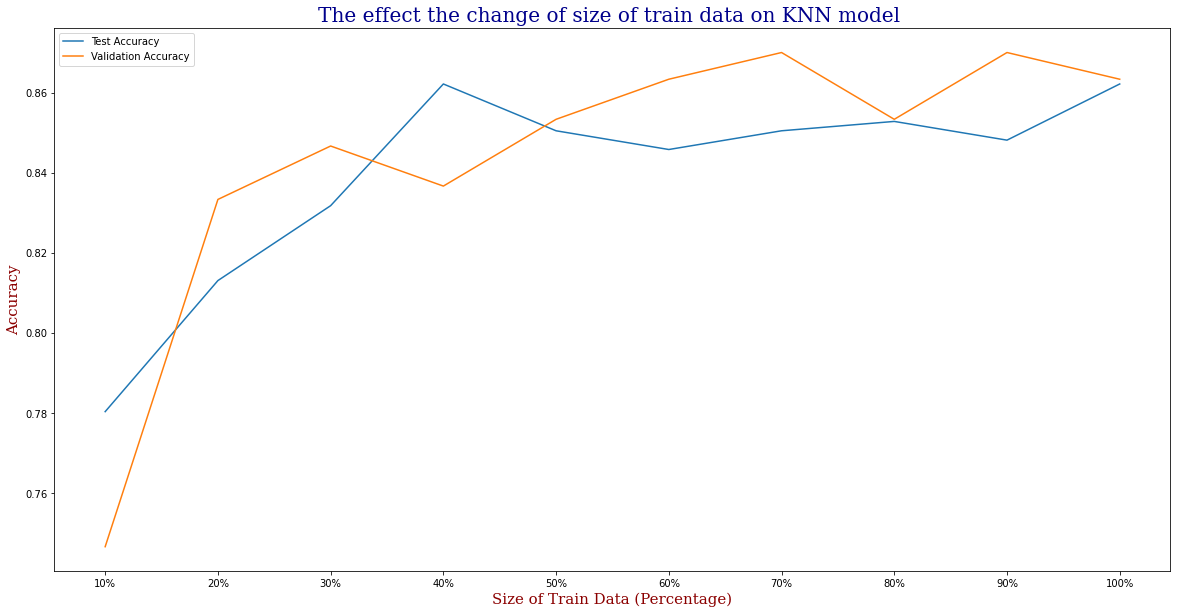

In [ ]:

size=x_train.shape[0]
train_size=[]
test_accuracy=[]
valid_accuracy=[]
for i in range(1,11):
    non_Parametric_model = KNeighborsClassifier(n_neighbors=2)  
    end=int(i*0.1*size)
    non_Parametric_model.fit(x_train.iloc[:end,:], y_train.iloc[:end])
    
    train_size.append(str(i*10) +'%' )
    
    y_pred_v=non_Parametric_model.predict(x_valid)
    valid_accuracy.append(accuracy_score(y_valid, y_pred_v))
    
    y_pred_t=non_Parametric_model.predict(x_test)
    test_accuracy.append(accuracy_score(y_test, y_pred_t))
plt.figure(figsize=(20,10))
print(test_accuracy)
print(valid_accuracy)
plt.plot(train_size, test_accuracy, label = "Test Accuracy")
plt.plot(train_size, valid_accuracy, label = "Validation Accuracy")

font1 = {'family':'serif','color':'darkblue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("The effect the change of size of train data on KNN model ", fontdict = font1)
plt.xlabel("Size of Train Data (Percentage)", fontdict = font2)
plt.ylabel("Accuracy", fontdict = font2)
plt.legend()
plt.show()

## Train and test non_Parametric_model (KNN) on multi number of neighbors and get the best number of neighbors it get highest accuracy

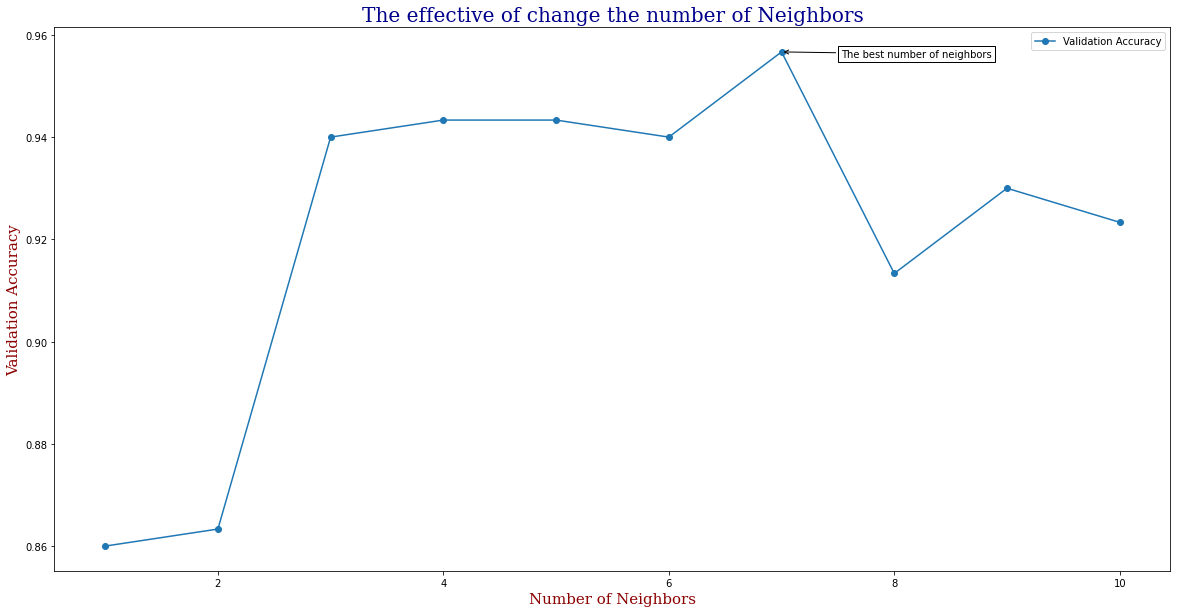


 The best number of neighbors is : 7


In [ ]:
train_size=[]
valid_accuracy=[]
for i in range(1,11):
    non_Parametric_model = KNeighborsClassifier(n_neighbors=i) 
    non_Parametric_model.fit(x_train, y_train)
    
    train_size.append(i )
    
    y_pred_v=non_Parametric_model.predict(x_valid)
    valid_accuracy.append(accuracy_score(y_valid, y_pred_v))

fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.plot(train_size, valid_accuracy, label = "Validation Accuracy",marker='o')


plt.title("The effective of change the number of Neighbors", fontdict = font1)
plt.xlabel("Number of Neighbors", fontdict = font2)
plt.ylabel("Validation Accuracy", fontdict = font2)
max_valid=max(valid_accuracy)
maxInd=np.argmax(np.array(valid_accuracy))
best_N_Neighbor=train_size[maxInd]
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k")
arrowprops=dict(arrowstyle="->")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
ax.annotate("The best number of neighbors", xy=(best_N_Neighbor, max_valid), xytext=(0.84,0.96), **kw)

plt.legend()
plt.show()
print(f'\n The best number of neighbors is : {best_N_Neighbor}')



Analysis the training time and testing time when use different number of training samples and different number of neighbors. 

• 10% of the whole training set and K = 2

• 100% of the whole training set and K = 2

• 10% of the whole training set and K = 10

• 100% of the whole training set and K = 10.

[0.003497878999041859, 0.003247121998356306, 0.0024290929995913757, 0.0030646199993498158]
[0.015013518001069315, 0.01735928499874717, 0.015425325000251178, 0.016786775999207748]


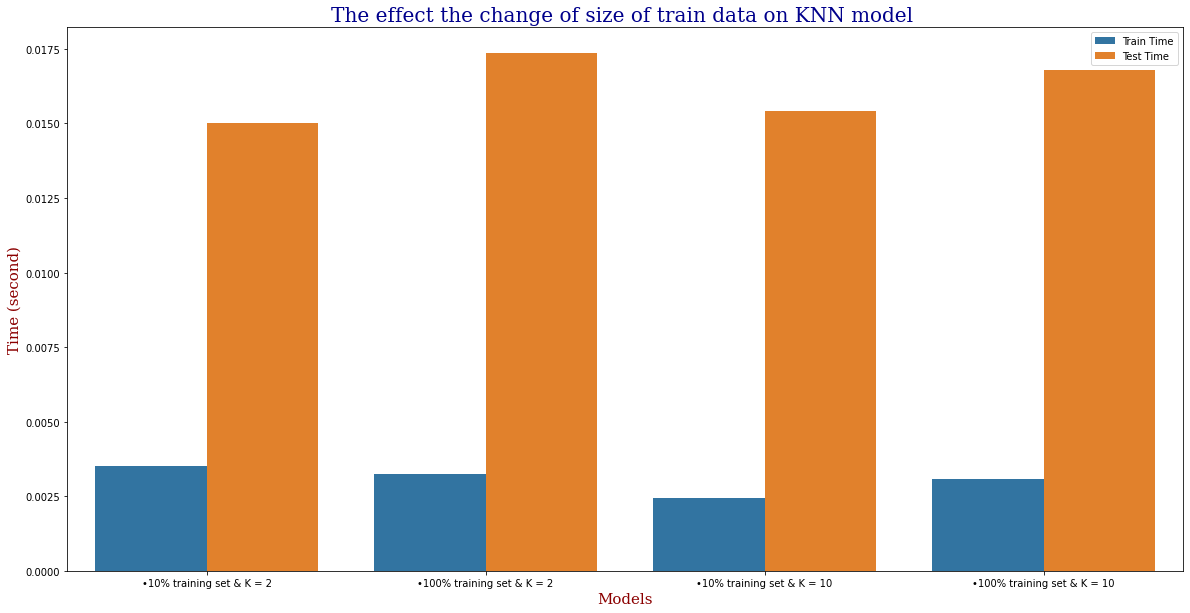

In [ ]:

train_time=[]
test_time=[]
d=[]
# • 10% of the whole training set and K = 2

KNN = KNeighborsClassifier(n_neighbors=2)  
start = timeit.default_timer()
KNN.fit(x_train.iloc[:100,:], y_train.iloc[:100])
end = timeit.default_timer()
train_time.append(end - start)
d.append(end - start)
start = timeit.default_timer()
y_pred_t=KNN.predict(x_test)
end = timeit.default_timer()
test_accuracy1=accuracy_score(y_test, y_pred_t)
test_time.append(end - start)
d.append(end - start)

#• 100% of the whole training set and K = 2

KNN = KNeighborsClassifier(n_neighbors=2)  
start = timeit.default_timer()
KNN.fit(x_train, y_train)
end = timeit.default_timer()
train_time.append(end - start)
d.append(end - start)
start = timeit.default_timer()
y_pred_t=KNN.predict(x_test)
end = timeit.default_timer()
test_accuracy1=accuracy_score(y_test, y_pred_t)
test_time.append(end - start)

d.append(end - start)


#• 10% of the whole training set and K = 10

KNN = KNeighborsClassifier(n_neighbors=10)  
start = timeit.default_timer()
KNN.fit(x_train.iloc[:100,:], y_train.iloc[:100])
end = timeit.default_timer()
train_time.append(end - start)
d.append(end - start)
start = timeit.default_timer()
y_pred_t=KNN.predict(x_test)
end = timeit.default_timer()
test_accuracy1=accuracy_score(y_test, y_pred_t)
test_time.append(end - start)
d.append(end - start)

#• 100% of the whole training set and K = 10

KNN = KNeighborsClassifier(n_neighbors=10)  
start = timeit.default_timer()
KNN.fit(x_train, y_train)
end = timeit.default_timer()
train_time.append(end - start)
d.append(end - start)
start = timeit.default_timer()
y_pred_t=KNN.predict(x_test)
end = timeit.default_timer()
test_accuracy1=accuracy_score(y_test, y_pred_t)
test_time.append(end - start)
d.append(end - start)


print(train_time)
print(test_time)

plt.figure(figsize=(20,10))

g = sns.barplot(x=['•10% training set & K = 2','•10% training set & K = 2','•100% training set & K = 2','•100% training set & K = 2','•10% training set & K = 10','•10% training set & K = 10','•100% training set & K = 10','•100% training set & K = 10'], y=d,hue=['Train Time','Test Time','Train Time','Test Time','Train Time','Test Time','Train Time','Test Time'])
font1 = {'family':'serif','color':'darkblue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("The effect the change of size of train data on KNN model ", fontdict = font1)
plt.xlabel("Models", fontdict = font2)
plt.ylabel("Time (second)", fontdict = font2)
plt.legend()
plt.show()


C)from the figure, it's concluded that increasing the size of training data will increase test and validation    
accuracies 

D)from the figure, it's concluded that the best k value is 7 (it achieved the highest accuracy)

E)from the figure, it's concluded that the prediction time is larger than the training time (because the KNN algorithm is a lazy learner as it calculates the Euclidean distance between the test point and all the training data to get the nearest K neighbors and detect which class based on the majority of k neighbors and all these calculation happen in prediction.

changing the number of k neighbors will affect a little bit the prediction time because the model already calculated the Euclidean distance between the prediction point and all training data.

when the train data size is increased the prediction time will increase because the KNN is a nonparametric algorithm and it uses train data in the prediction.

